## Topic 9  Add Dynamics

In [7]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim 
from control_materials import *

Basic file found
Running Python: 3.12.6
Running Sympy: 1.13.2
Control Package Found


In [8]:
def plot_add_dynamics(G0,Gd,fig_caption,file_name):
    for kk,Gpert in enumerate(Gd):
        G1 = G0*Gpert
        
        fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
        _, klist = rlocus(G0, kvect=Root_Locus_gains(G0), color='b', grid=False,ax=ax[0])
        ax[0].set_xlim([-5, 5]);ax[0].set_ylim([-5, 5])
        nicegrid(ax[0],5)
        
        _, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist), color='b', grid=False,ax=ax[1])
        ax[1].set_xlim([-5, 5]);ax[1].set_ylim([-5, 5])
        nicegrid(ax[1],5)
        caption(fig_caption[kk],fig)
        for kk in range(2):
            ax[kk].set_xlabel('Real')
            ax[kk].set_ylabel('Imaginary')

        savefig(file_name+str(kk+1)+".pdf", dpi=600)
        plt.show()
        
        fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
        _, klist = rlocus(G0, kvect=Root_Locus_gains(G0), color='b', grid=False,ax=ax[0])
        ax[0].set_xlim([-5, 5]);ax[0].set_ylim([-5, 5])
        nicegrid(ax[0],5)
        
        _, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist), color='b', grid=False,ax=ax[1])
        ax[1].set_xlim([-5, 5]);ax[1].set_ylim([-5, 5])
        nicegrid(ax[1],5)
        caption(fig_caption[kk],fig)
        
        for kk in range(2):
            ax[kk].set_xlabel('Real')
            ax[kk].set_ylabel('Imaginary')

        savefig(file_name+str(kk+1)+"_sol.pdf", dpi=600)
        plt.show()


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -1.423


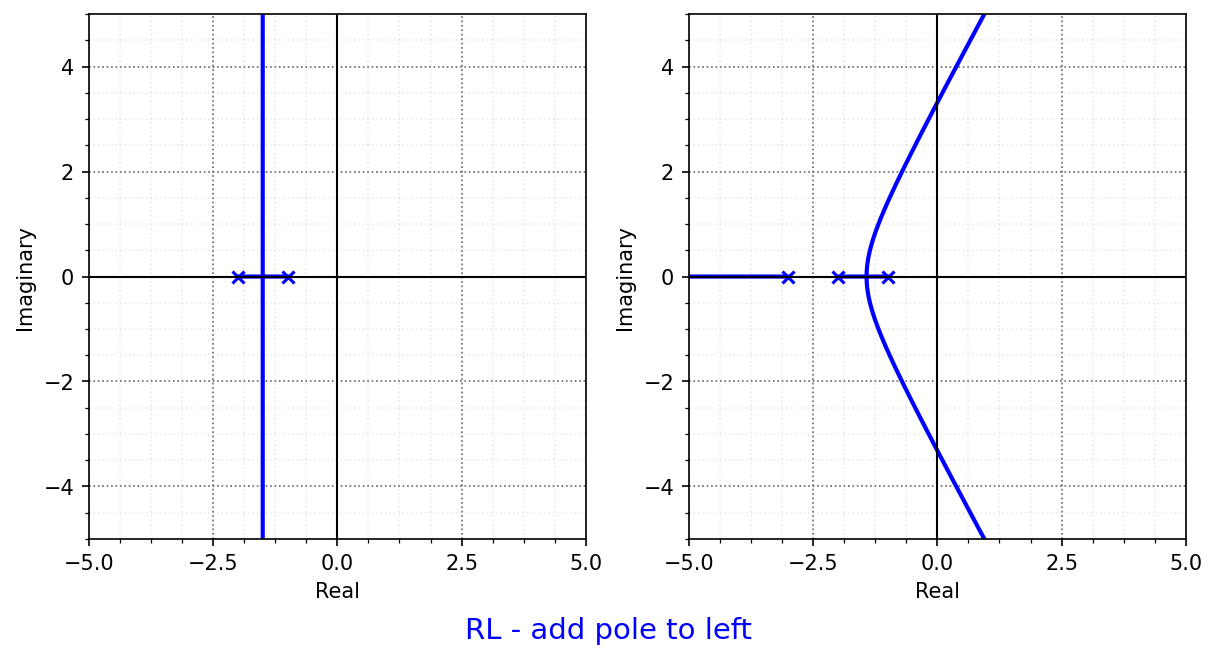


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -1.423


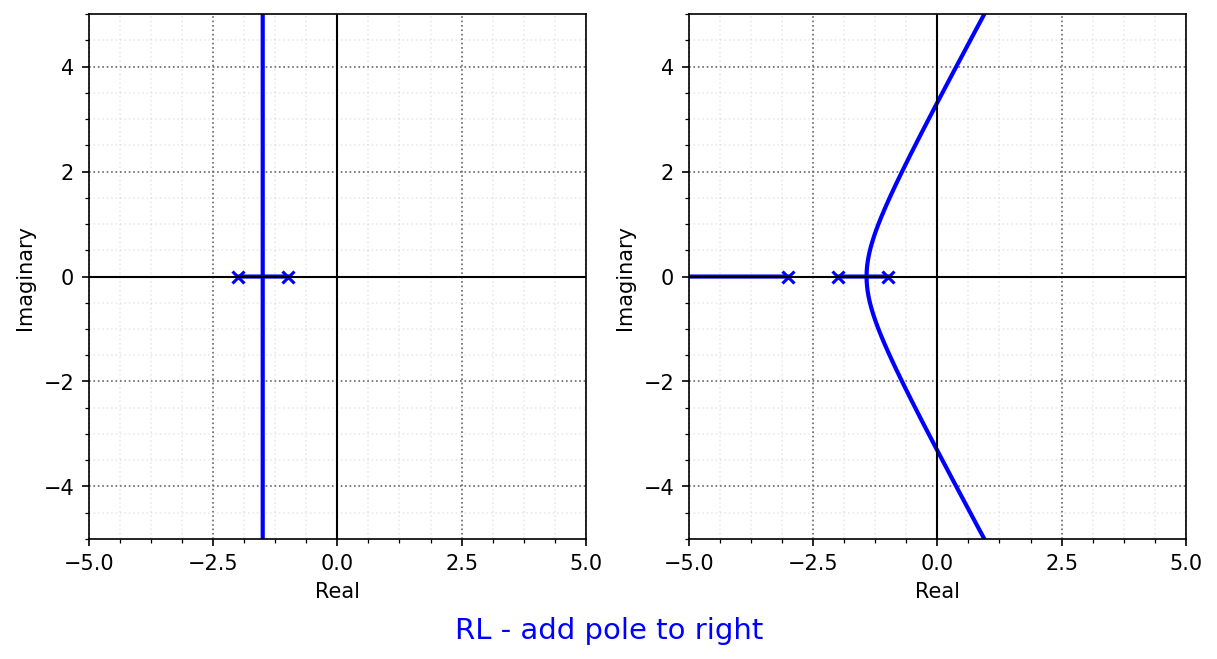


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -0.423


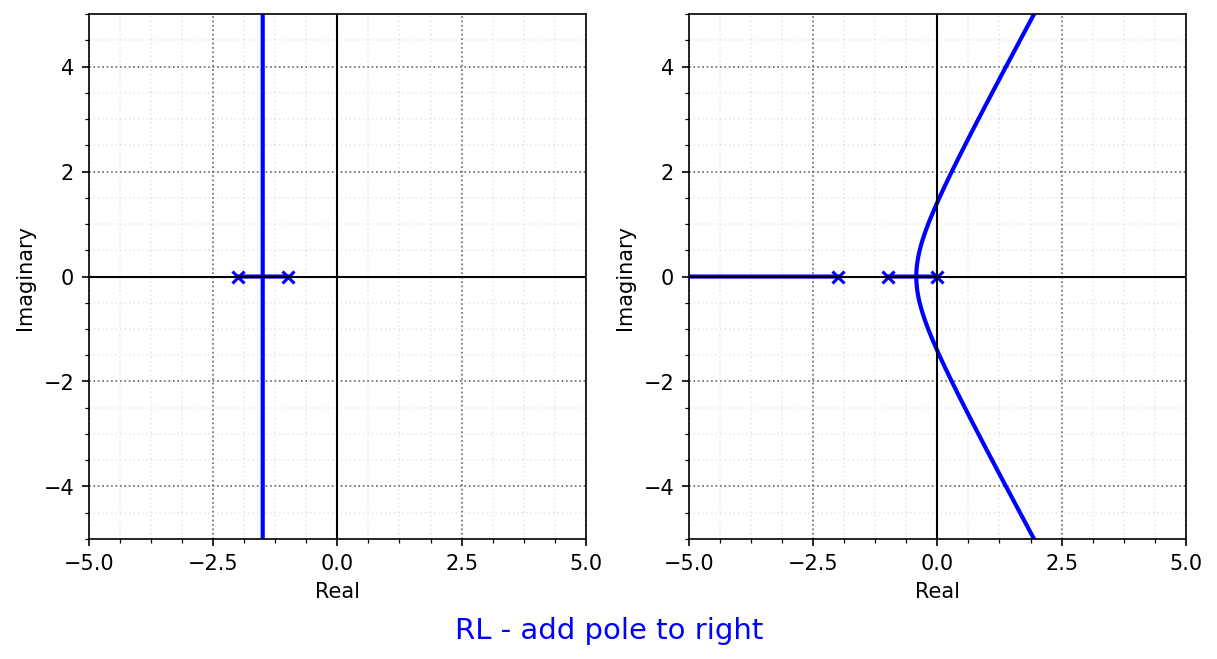


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -0.423


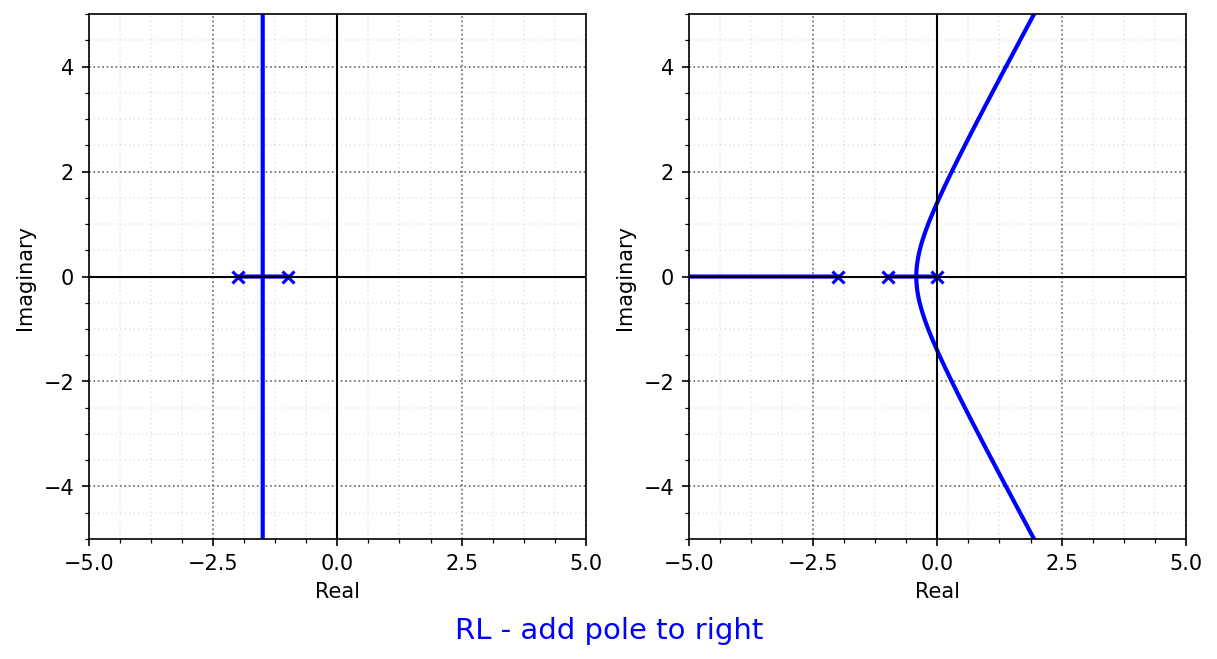


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 5.828
At possible locations s = -4.414

Found breakin/out at K = 0.172
At possible locations s = -1.586


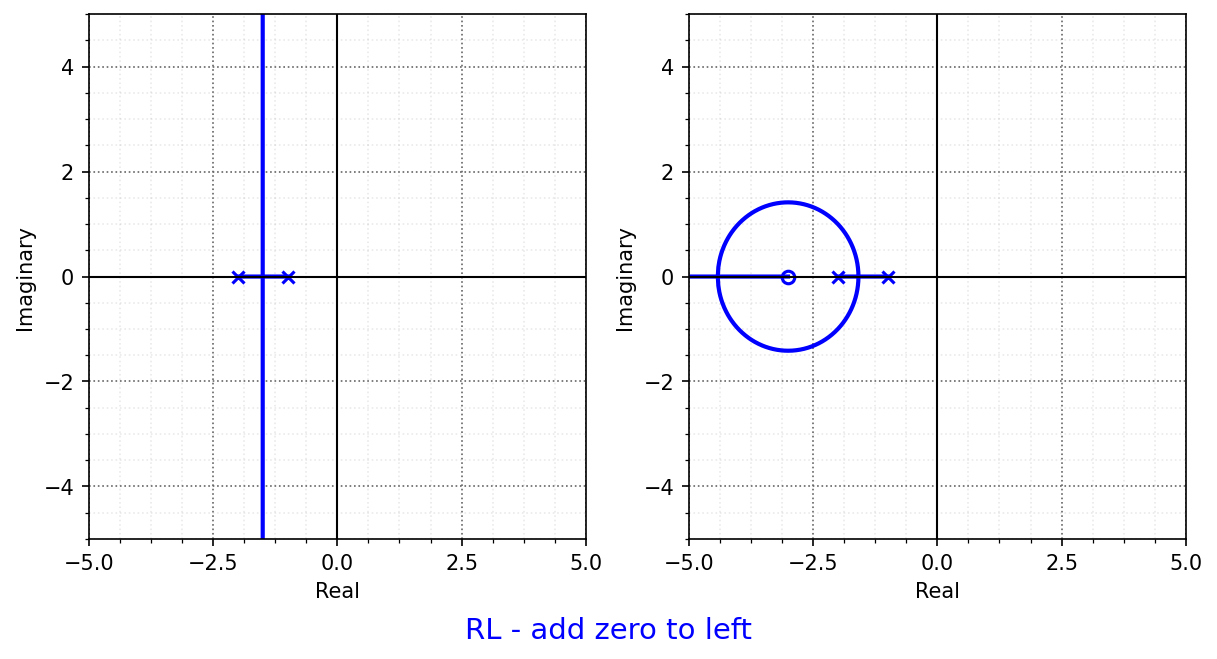


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 5.828
At possible locations s = -4.414

Found breakin/out at K = 0.172
At possible locations s = -1.586


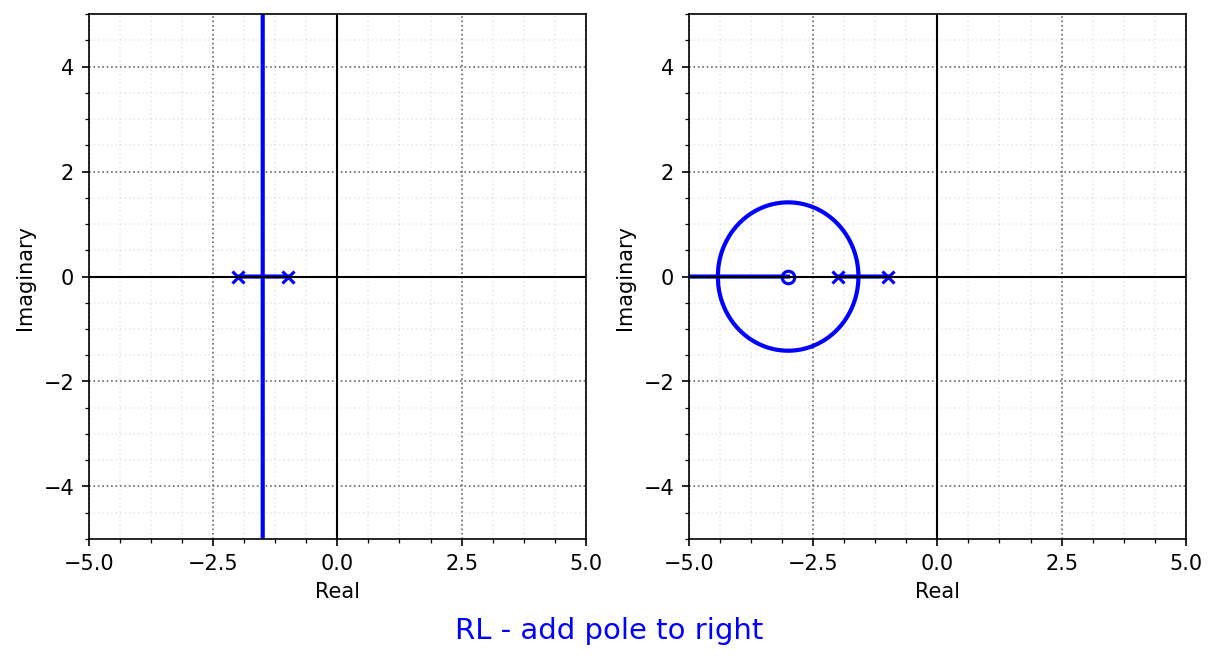


Found breakin/out at K = 0.250
At possible locations s = -1.500


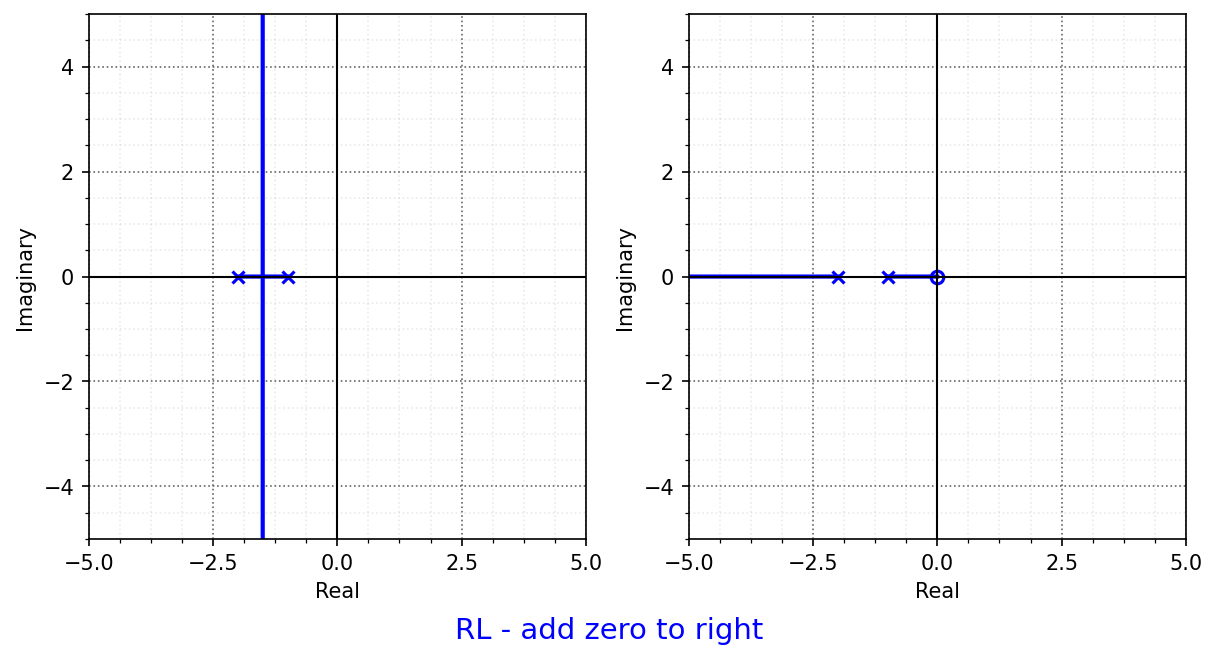


Found breakin/out at K = 0.250
At possible locations s = -1.500


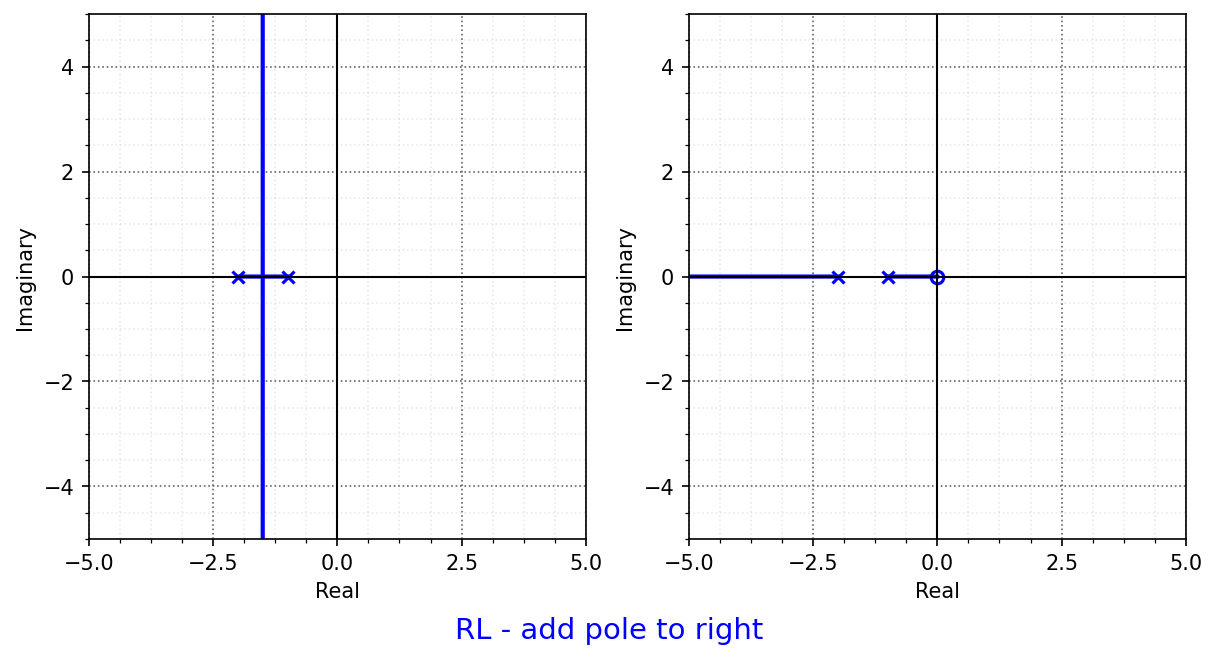


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.151
At possible locations s = -1.468


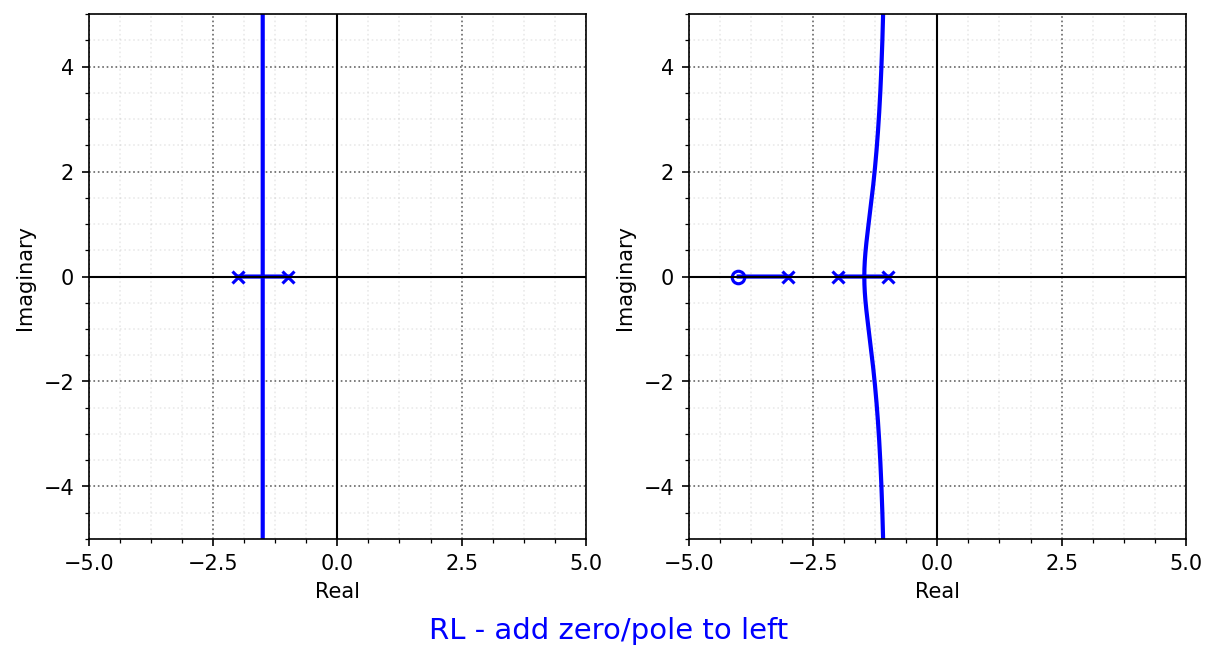


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.151
At possible locations s = -1.468


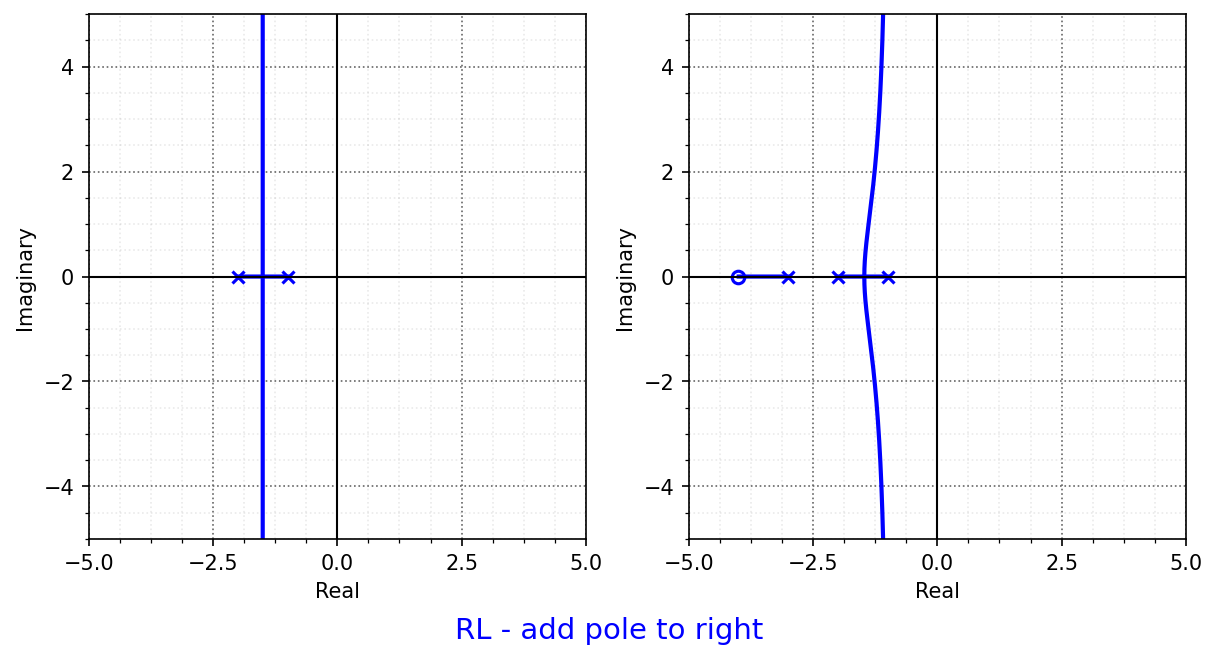


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.168
At possible locations s = -1.539


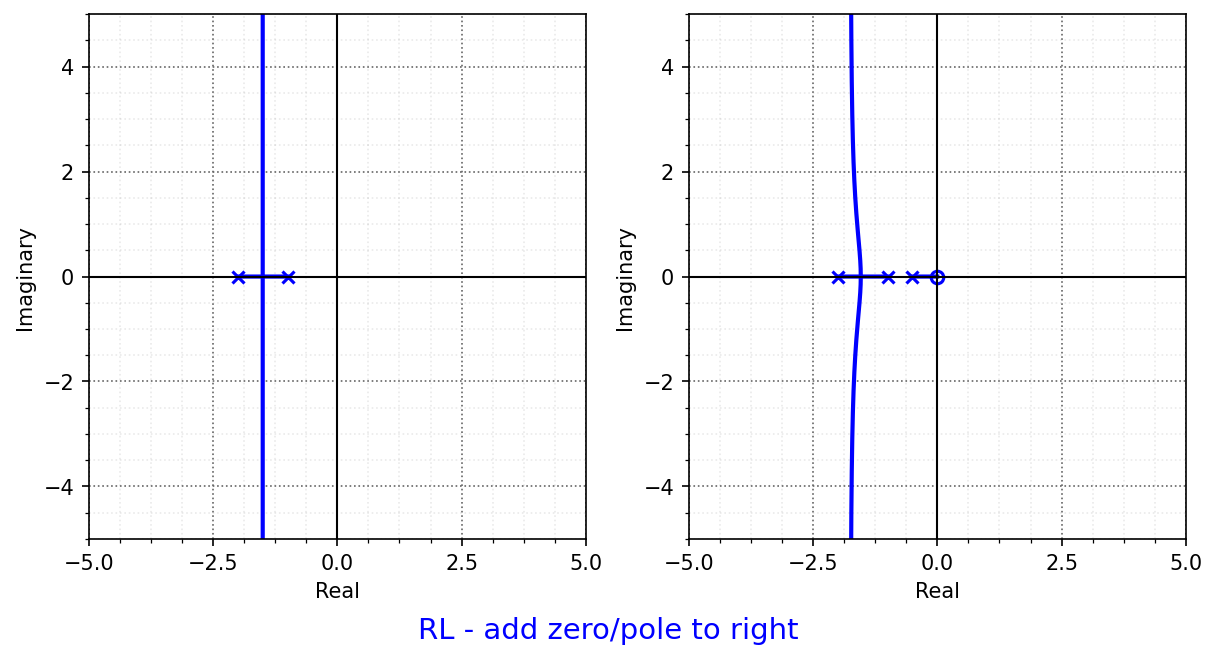


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.168
At possible locations s = -1.539


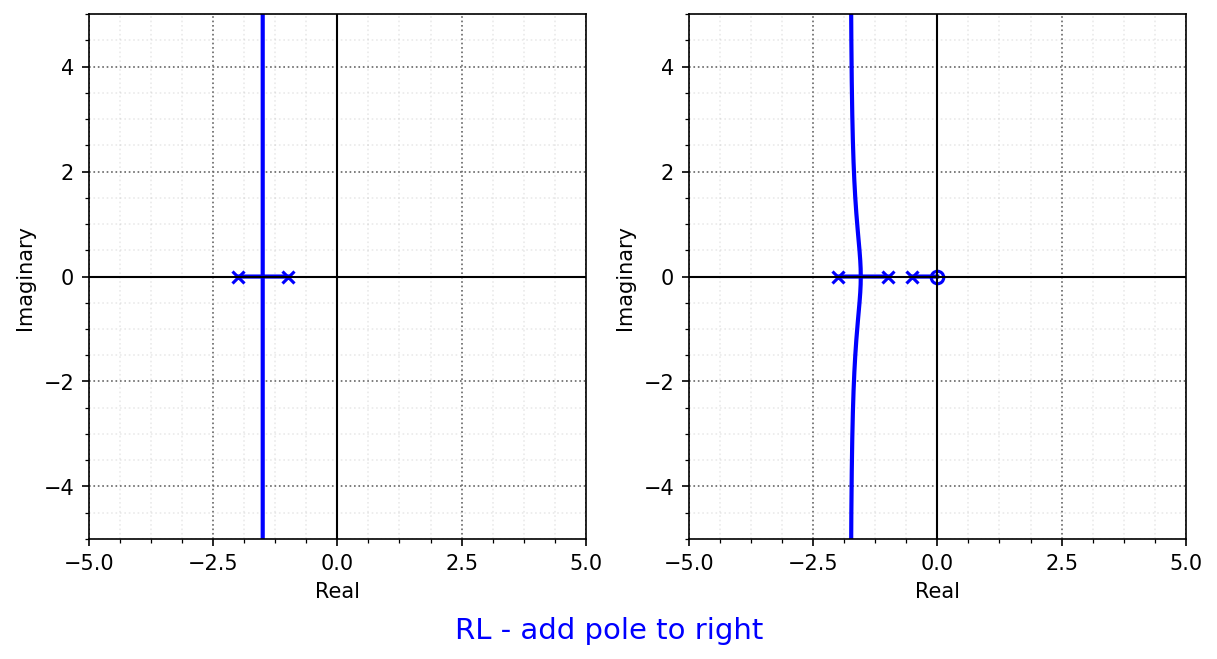

In [9]:
# add dynamics
G0 = tf(np.convolve((0, 1),(0, 1)), np.convolve((1,1),(1, 2)))

Gd = [
    tf((0, 1), (1, 3)),
    tf((0, 1), (1, 0)),
    tf((1, 3), (0, 1)),
    tf((1, 0), (0, 1)),
    tf((1, 4), (1, 3)),
    tf((1, 0), (1, 0.5))]
fig_caption = [
    "RL - add pole to left", 
    "RL - add pole to right",
    "RL - add zero to left",
    "RL - add zero to right",
    "RL - add zero/pole to left",
    "RL - add zero/pole to right"
]
file_name = "./figs/L9_"
plot_add_dynamics(G0,Gd,fig_caption,file_name)

## Add More Dynamics

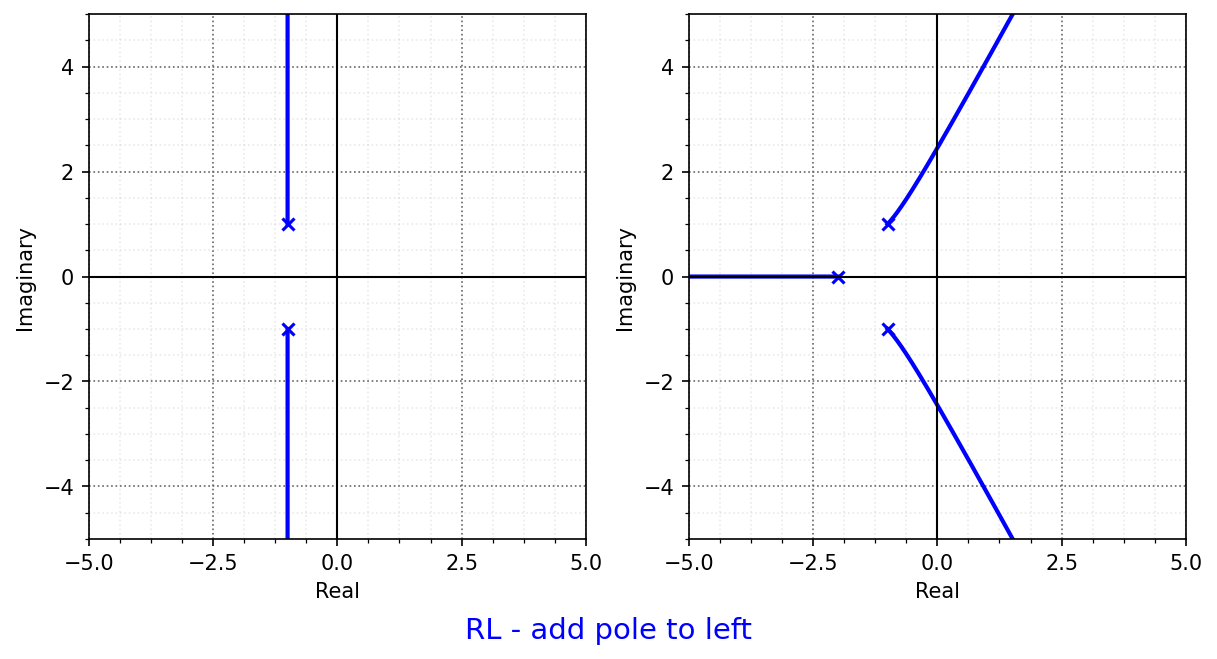

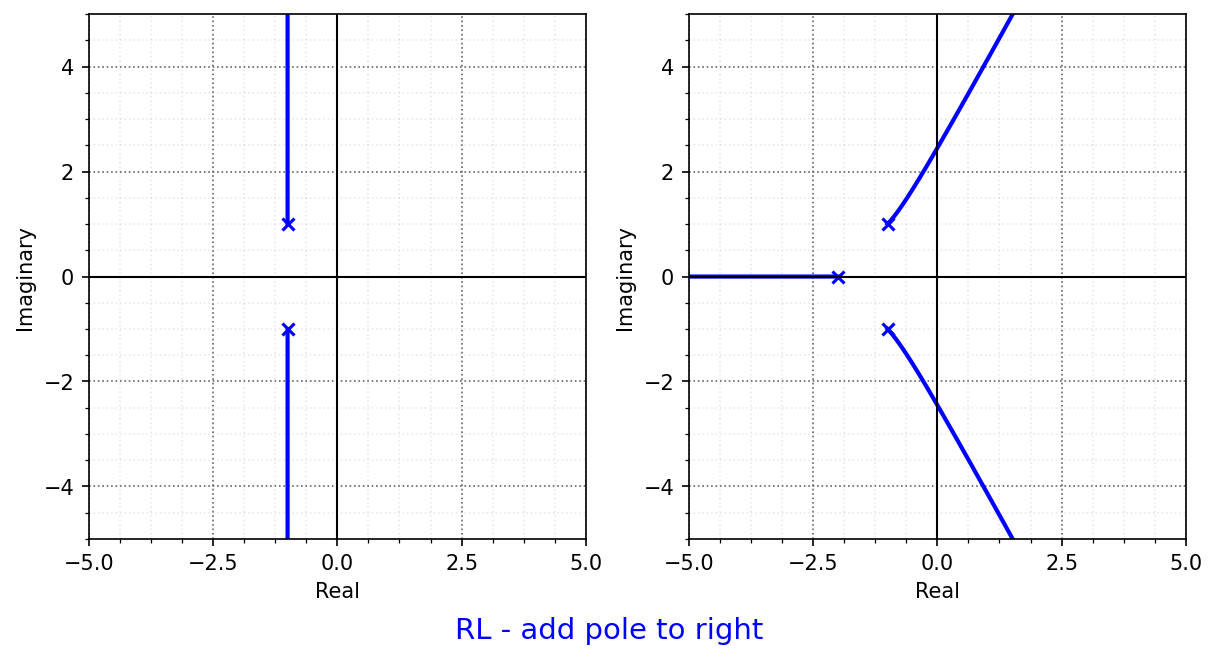

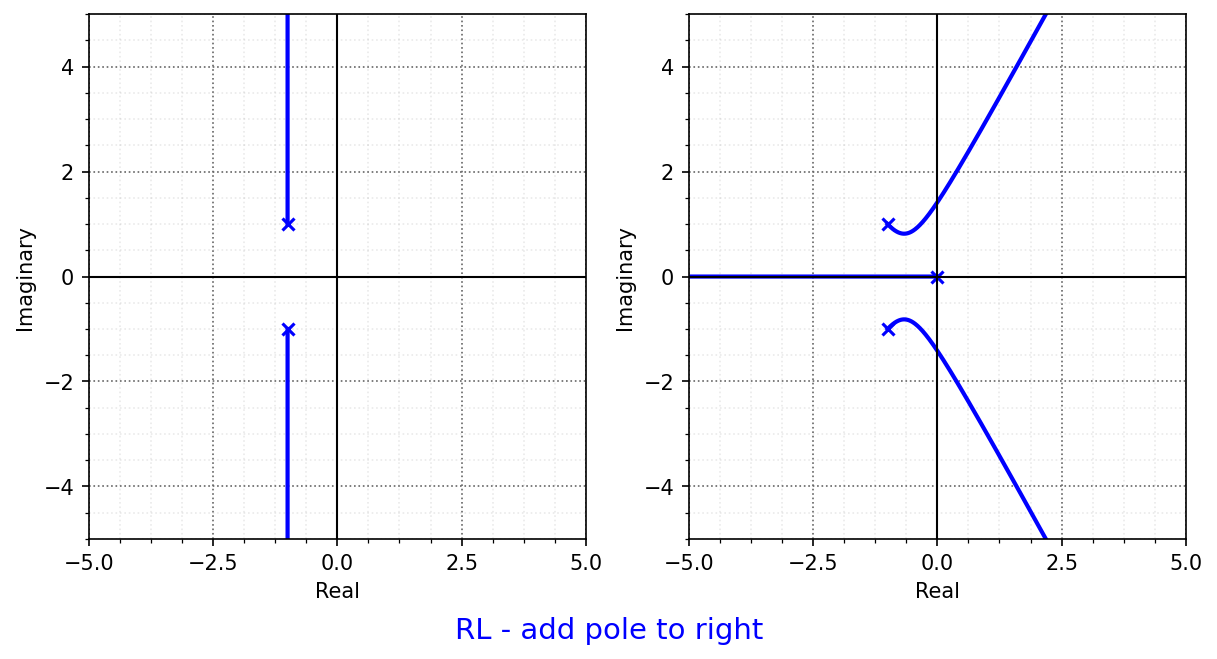

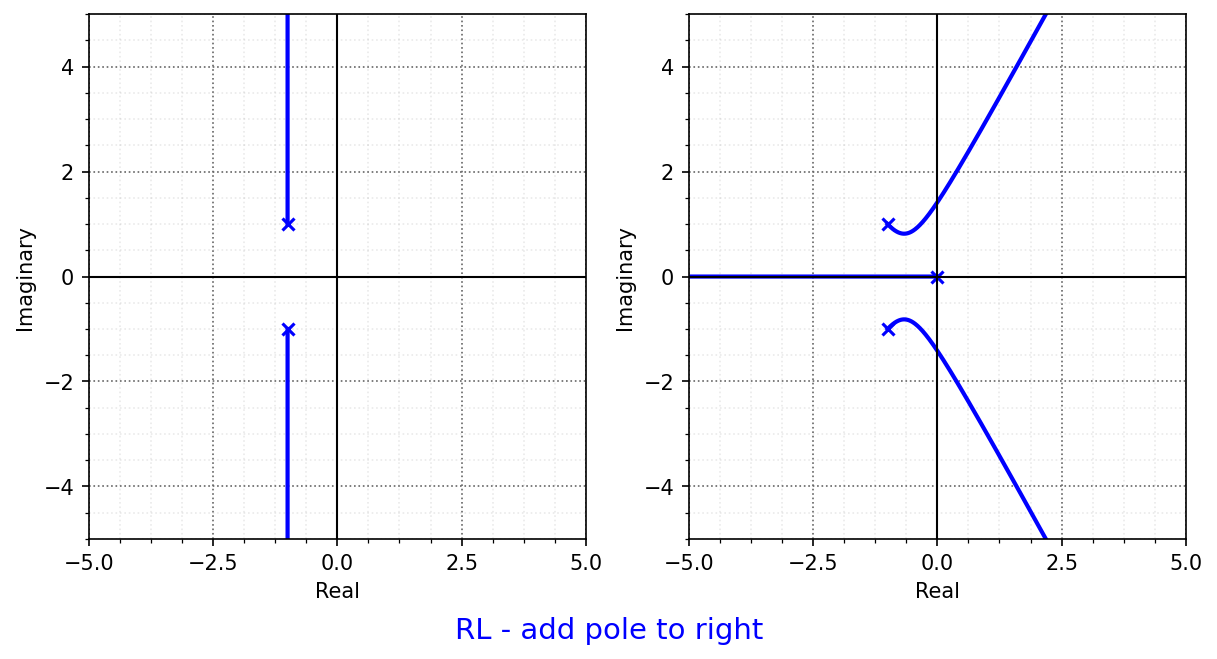


Found breakin/out at K = 4.828
At possible locations s = -3.414


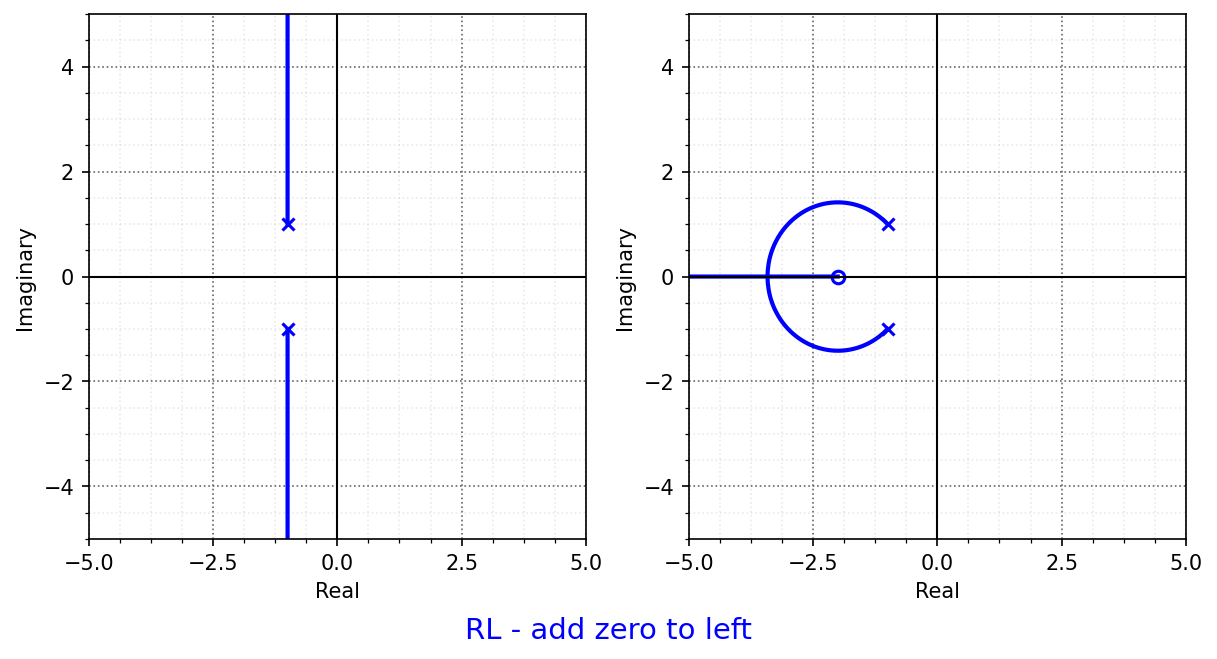


Found breakin/out at K = 4.828
At possible locations s = -3.414


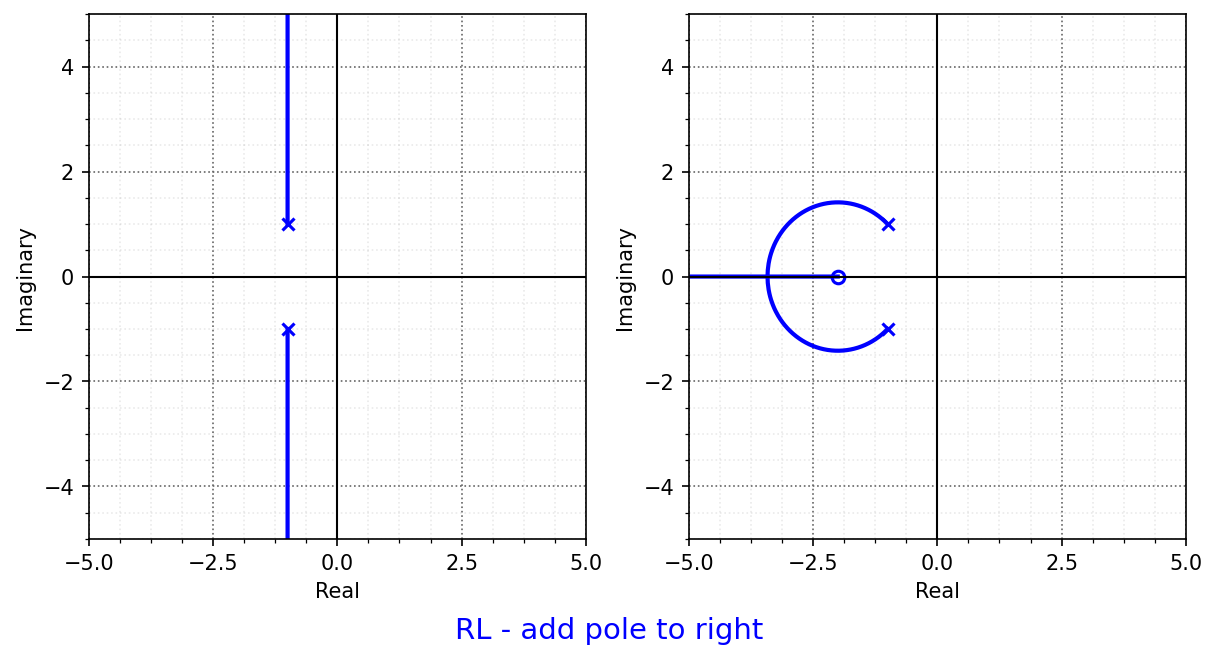


Found breakin/out at K = 0.828
At possible locations s = -1.414


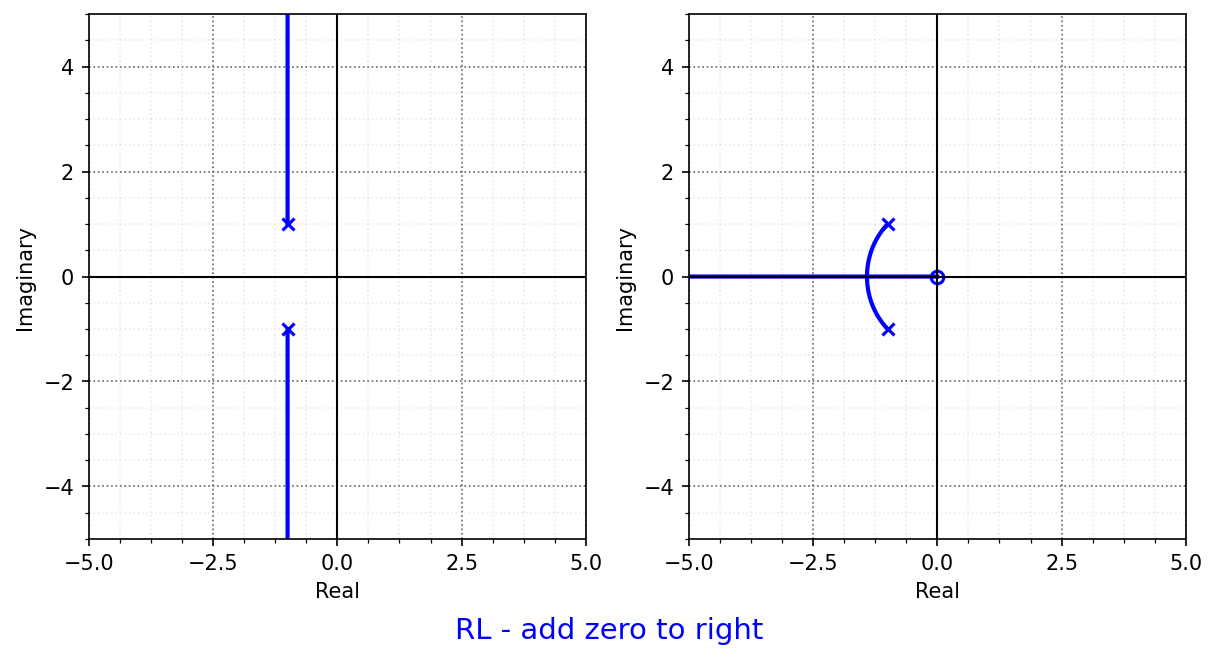


Found breakin/out at K = 0.828
At possible locations s = -1.414


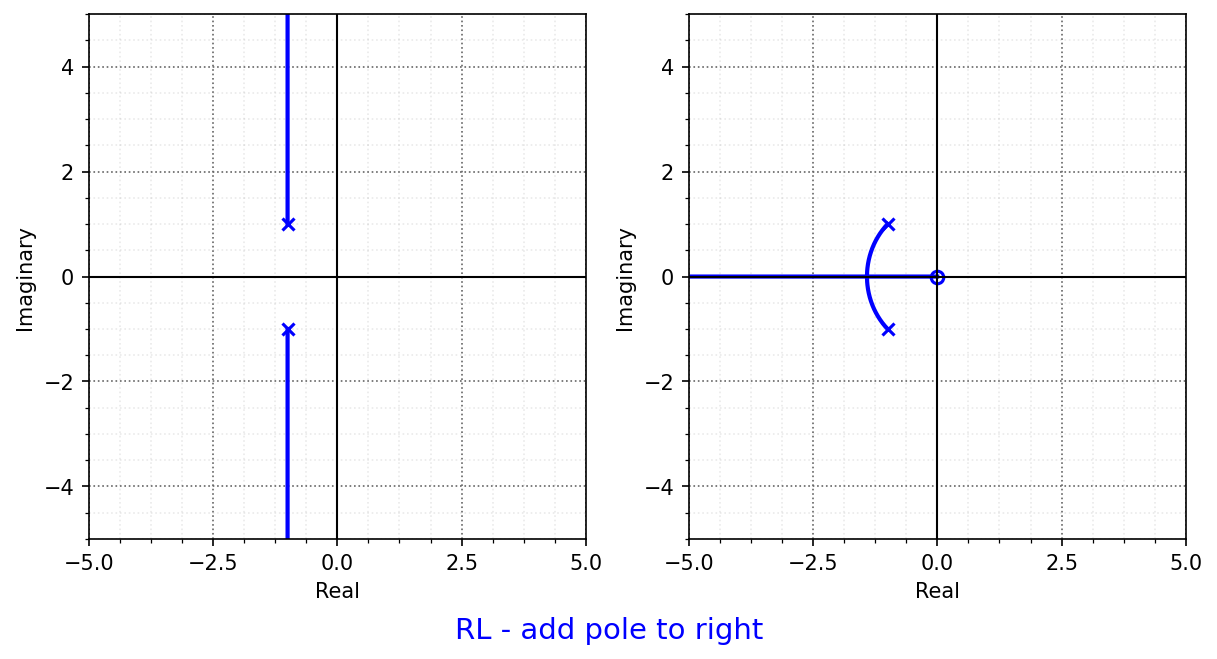

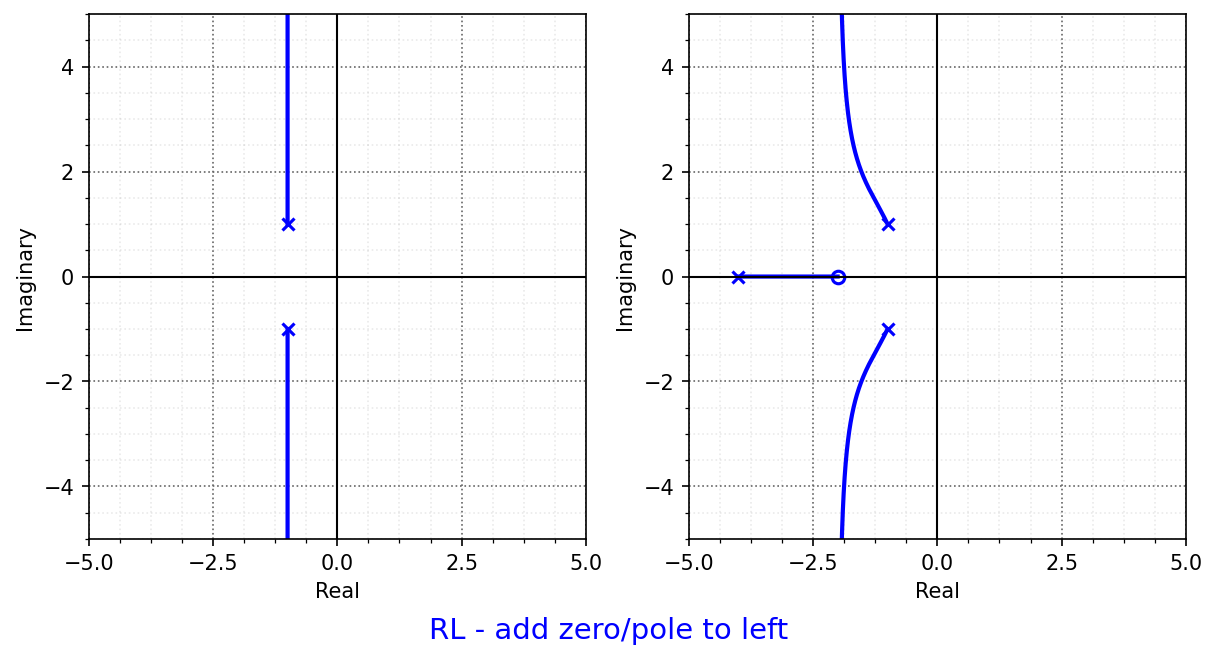

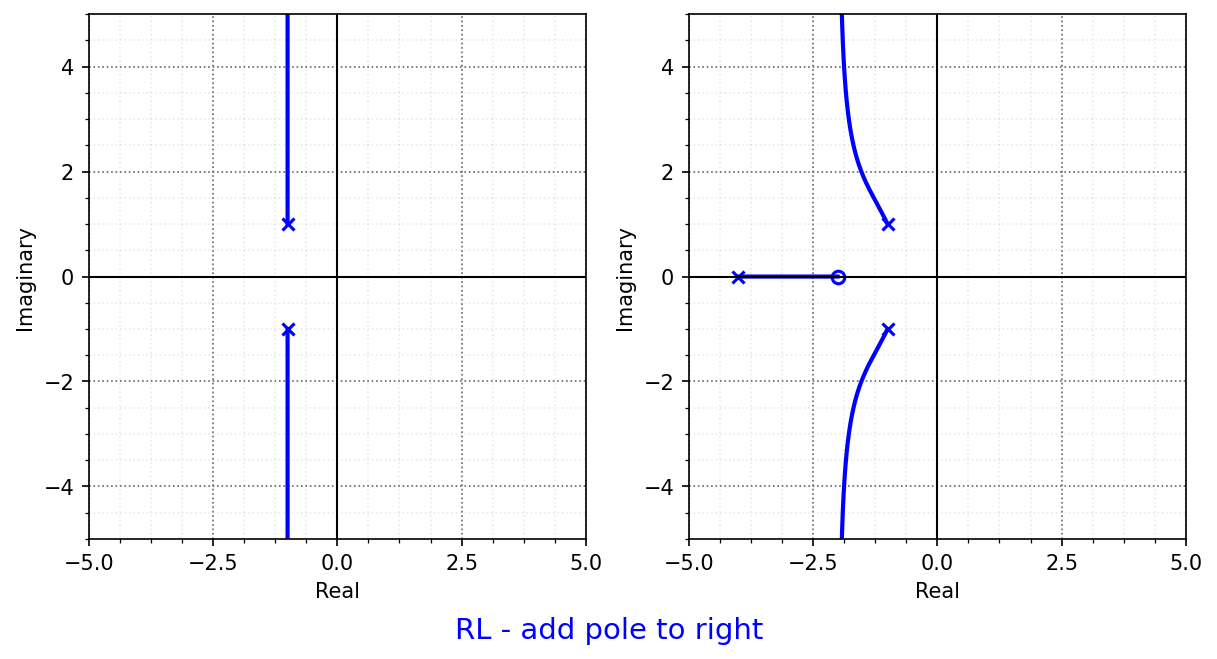

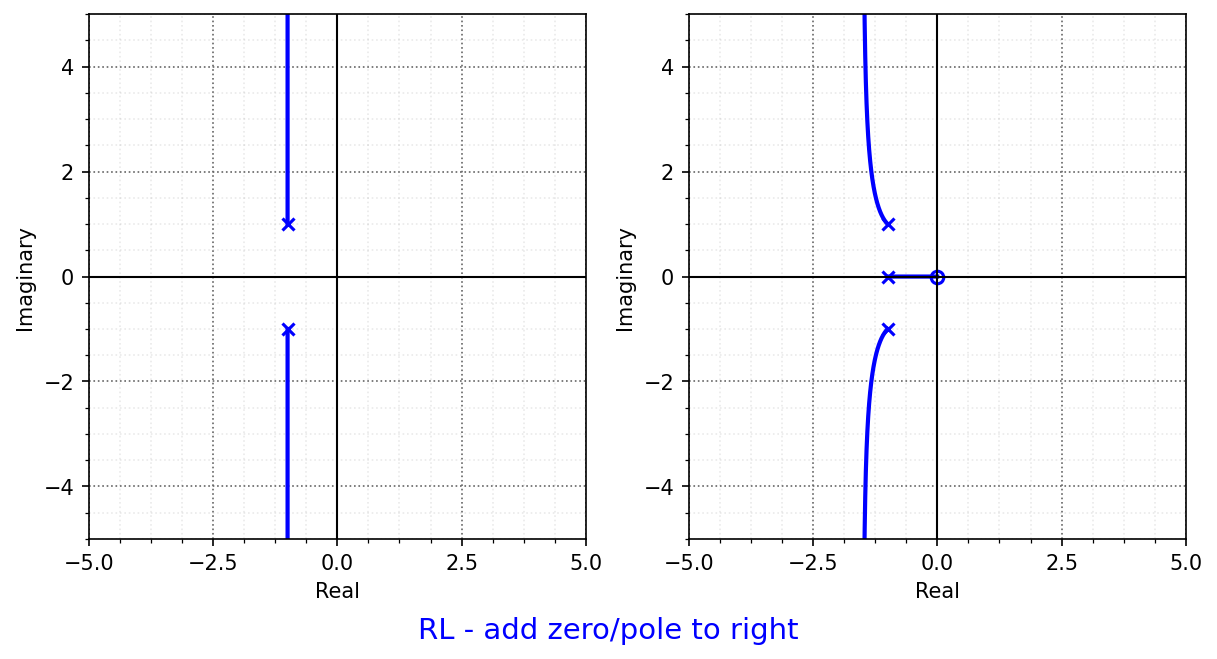

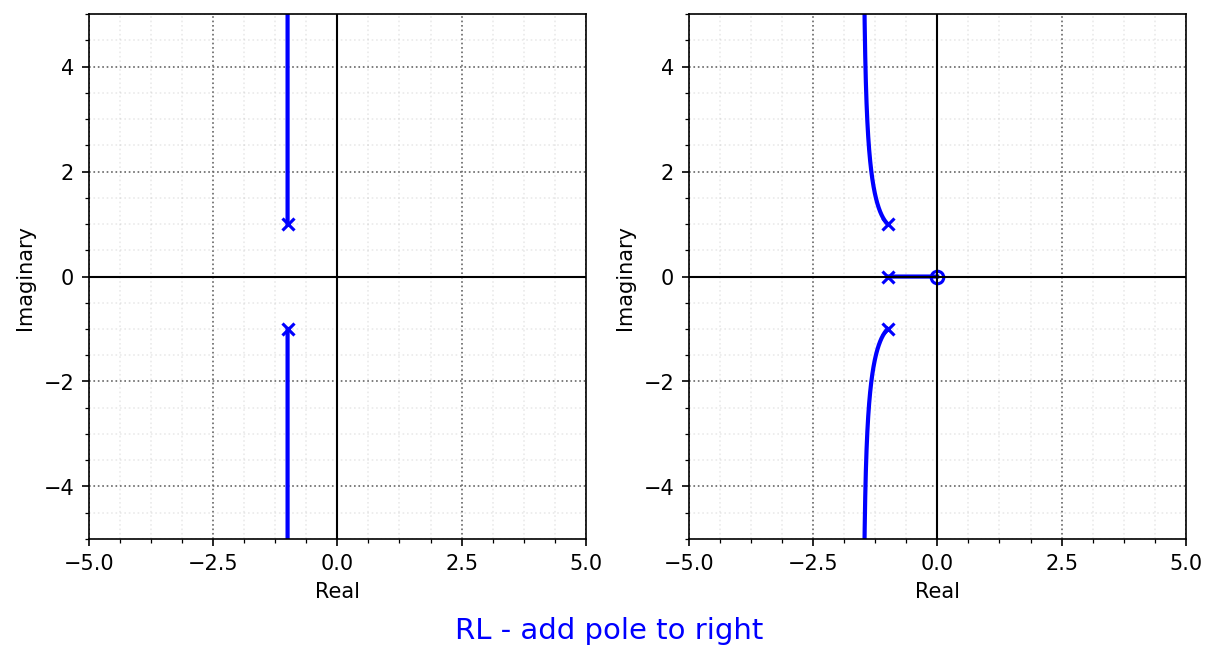

In [10]:
# add dynamics
G0 = tf(1, (1,2,2))

Gd = [
    tf((0, 1), (1, 2)),
    tf((0, 1), (1, 0)),
    tf((1, 2), (0, 1)),
    tf((1, 0), (0, 1)),
    tf((1, 2), (1, 4)),
    tf((1, 0), (1,1))]
fig_caption = [
    "RL - add pole to left", 
    "RL - add pole to right",
    "RL - add zero to left",
    "RL - add zero to right",
    "RL - add zero/pole to left",
    "RL - add zero/pole to right"
]
file_name = "./figs/L9_2_"
plot_add_dynamics(G0,Gd,fig_caption,file_name)